# Lecture III: Solving Macro problems with MATLAB

"*The code you wrote makes you a programmer. The code you delete makes you a good one. The code you do not have to write makes you a great one*" - Mario Fusco

## 1. Let's eat cake!

Imagine that you have a delicious cake. You could just eat it at once, but we are economists, and we know that this could not be the optimal solution. Why?

Because we know that people like smooth consumption, so if we eat all the cake today, we will not have a piece of cake to eat tomorrow.

Also, we know that we have decreasing marginal utility, which means that the 16th piece of cake we eat in a row will give us less utility than the first piece of cake we eat tomorrow.

So, how do we decide how much cake we will eat each day?

In this lecture, we will learn how to compute how much cake we should eat. Then, we will apply this knowledge to solve the Solow model, a model in which we have to decide a sequence of consumption and investment.

So, imagine we have one cake that we can divide as we want. Also, assume that we have log preferences and that our intertemporal discount factor is $\beta$. So:

$$ U(c) = \log(c) $$

And we want to maximize the following:

$$ \sum_{i=0}^\infty \beta^i \log(c_i) $$

So in the first period, we have an amount one of cake. Imagine that we decide to eat an amount $\alpha$, such that $0<\alpha<1$. In that case, for the next period, we will start with an amount $1-\alpha$ of cake. It is important to know this because the amount of cake we have left restricts the amount of cake that we can eat in each period.

Let's create a variable to tell us the amount of cake that we have at the beginning of each period. We will call this variable $a$. Now, notice that this is a recursive problem. In the beginning, we will eat a bit and save the rest for tomorrow. Tomorrow, we will check how much cake we have left (which is the initial amount minus what we ate yesterday), eat another bit, and save it for the day after tomorrow. And so on.

The only thing that will change every period is the amount of cake we have left. What if we assign a value to that? Given the amount of cake we have left, imagine a function that gives us the **present value of discounted future utilities** that we will receive from that cake under the **optimal consumption plan**. Let's call this function $V()$.

So, $V(a)$ is the discounted sum of future utilities under the optimal plan when we have an amount $a$ of cake. If we start with $a$, and we choose to consume an amount $c$, we will receive an utility $\log(c)$ and we will have $a-c$ cake for tomorrow, which will gives us the value $V(a-c)$

$$ V(a) = \max_c \left[ \log(c) + \beta V(a-c) \right]$$

Now, notice that $a-c$ is the amount of cake that we will have in the next period. We will call this $a'$.

$$ V(a) = \max_c \left[ \log(c) + \beta V(a') \right]$$

$$ s.t: a' = a-c $$

Let's formalize this. We will call the function $V()$ the **value function**. This is a function that we do not know. Also, we will call $a$ our **state variable**. The state variables are the variables needed to know to solve the problem. Finally, we will call $c$ the **control variable**. We can choose these variables, and by doing that, we can affect state variables.

Notice that this problem is unlike anything we have seen before. We have a functional equation in which we need to find a function: $V()$. 

So, how do we solve this? Well, it is pretty simple, really (after all, we are just eating cake). The idea is to find the optimal consumption plan to maximize the discounted sum of future utilities, so we will try any possible consumption plan and keep the best one.

To solve this, we will divide the problem into steps. First, we need something that tells us the utility of eating a given piece of cake. To do this, we will need to define a grid of consumption. This will discretize the problem; that means the individual can only choose a level of consumption inside the grid. Given the above, we need to be careful and use a grid that is big enough not to cause problems.

In [28]:
beta = 0.90;
max_iter = 30;

cake = linspace(0,1,10);

cake

U = log(cake);

U

cake = 1x10 double
         0    0.1111    0.2222    0.3333    0.4444    0.5556    0.6667    0.7778    0.8889    1.0000

U = 1x10 double
      -Inf   -2.1972   -1.5041   -1.0986   -0.8109   -0.5878   -0.4055   -0.2513   -0.1178         0

Notice that the utility when we do not have cake (i.e. $cake=0$) is $-\infty$. We want to avoid values like this because they will cause trouble in our next steps. So we will change our utility function to:

$$ U(c) = \log(1+c) $$

This is the same idea, but now we guarantee zero minimum utility.

In [30]:
cake = linspace(0,1,10);

cake

U = log(1+cake);

U

cake = 1x10 double
         0    0.1111    0.2222    0.3333    0.4444    0.5556    0.6667    0.7778    0.8889    1.0000

U = 1x10 double
         0    0.1054    0.2007    0.2877    0.3677    0.4418    0.5108    0.5754    0.6360    0.6931

Excellent! Now, we can move to the next step.

In this step, we will assume some values for our value function. Which values will we assume? We could use the logic and think that the bigger the cake we have, the bigger the value function for that cake should be. However, although that logic is correct, we will start from a ignorant guess: the value function will be zero for each value of the cake.

In [32]:
V = zeros(length(cake),1);

Now, for each possible amount of cake, we will choose a level of consumption. We will receive the utility of that consumption plus the discounted value of the value function for the remaining cake.

In [34]:
aux=zeros(length(cake),length(cake));

for a=1:length(cake) %Cake at the beginning of the period
    for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
        if a_prime>a %We cannot eat more than the total cake
            aux(a,a_prime)=-inf;
        else
            aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V(a_prime);
        end
    end
end

aux

aux = 10x10 double
         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.2877    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.3677    0.2877    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf
    0.4418    0.3677    0.2877    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf
    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054   -0.0000      -Inf      -Inf      -Inf
    0.5754    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054   -0.0000      -Inf      -Inf
    0.6360    0.5754    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054         0      -Inf
    0.6931    0.6360    0.5754    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054         0

So, this matrix shows us the value we will receive if we start with a given amount of cake (given by the rows) and decide to leave a certain amount of cake for tomorrow (given by the columns).

Notice that the diagonal is $0$ because, at that point, the amount of cake we leave for tomorrow is the same as we have today, implying that the consumption is zero, and $\log(1+0)=0$

Notice also that the greater the consumption (the distance from the diagonal), the bigger the utility. This is, of course, due to the fact that we are eating more cake.

## 2. A new cake

Great! Now, we have all the ingredients to solve our problem. Just be aware that the value function collects the **maximum value** given that it results from choosing the optimal consumption plan. Remember our expression for the value function:

$$ V(a) = \max_c \left[ \log(1+c) + \beta V(a') \right]$$

So, for each level of cake (row), we will compute the maximum value and assign that to the value function.

In [41]:
V = zeros(length(cake),1);

aux=zeros(length(cake),length(cake));

for a=1:length(cake) %Cake at the beginning of the period
    for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
        if a_prime>a %We cannot eat more than the total cake
            aux(a,a_prime)=-inf;
        else
            aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V(a_prime);
        end
    end
end

aux

V = max(aux')

aux = 10x10 double
         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.2877    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.3677    0.2877    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf      -Inf
    0.4418    0.3677    0.2877    0.2007    0.1054         0      -Inf      -Inf      -Inf      -Inf
    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054   -0.0000      -Inf      -Inf      -Inf
    0.5754    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054   -0.0000      -Inf      -Inf
    0.6360    0.5754    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054         0      -Inf
    0.6931    0.6360    0.5754    0.5108    0.4418    0.3677    0.2877    0.2007    0.1054         0

V = 1x10 double
         0    0.1054    0.2007    0.2877    0.3677    0.4418    0.5108    0.5754    0.6360    0.6931

Great. We started from zero, and now we have something that makes sense. The value function is increasing in the amount of cake. However, we should do this again because this is the result of the value function when the initial guess is zero.

In [43]:
aux=zeros(length(cake),length(cake));

for a=1:length(cake) %Cake at the beginning of the period
    for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
        if a_prime>a %We cannot eat more than the total cake
            aux(a,a_prime)=-inf;
        else
            aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V(a_prime);
        end
    end
end

aux

V = max(aux')

aux = 10x10 double
         0      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.1054    0.0948      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.2007    0.2002    0.1806      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.2877    0.2955    0.2860    0.2589      -Inf      -Inf      -Inf      -Inf      -Inf      -Inf
    0.3677    0.3825    0.3813    0.3643    0.3310      -Inf      -Inf      -Inf      -Inf      -Inf
    0.4418    0.4625    0.4683    0.4596    0.4363    0.3976      -Inf      -Inf      -Inf      -Inf
    0.5108    0.5367    0.5483    0.5466    0.5316    0.5030    0.4597      -Inf      -Inf      -Inf
    0.5754    0.6057    0.6224    0.6266    0.6186    0.5983    0.5651    0.5178      -Inf      -Inf
    0.6360    0.6702    0.6914    0.7007    0.6987    0.6853    0.6604    0.6232    0.5724      -Inf
    0.6931    0.7308    0.7560    0.7697    0.7728    0.7654    0.7474    0.7185    0.6778    0.6238

V = 1x10 double
         0    0.1054    0.2007    0.2955    0.3825    0.4683    0.5483    0.6266    0.7007    0.7728

Again, we have something that makes sense. However, notice that the values of the value function have changed. Let's create a variable that tells us how much the variable is changing.

In [45]:
V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

max_iter = 2;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V_0(a_prime);
            end
        end
    end
    
    V = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

dif

dif = 30x1 double
    3.8186
    0.2822
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
...

Excellent, so the difference between the guess and the current value function is decreasing. Would it continue decreasing if we increase the number of iterations? Well, yes.

In [47]:
V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

max_iter = 4;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V_0(a_prime);
            end
        end
    end
    
    V = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

dif

dif = 4x1 double
    3.8186
    0.2822
    0.0400
         0

Great! In the fourth iteration, we are ready! Let's check the value function.

In [49]:
V

V = 1x10 double
         0    0.1054    0.2007    0.2955    0.3825    0.4683    0.5536    0.6337    0.7120    0.7892

It makes complete sense. More cake implies a higher value for the value function. Now, we can plot the value function by adding the amount of cake.

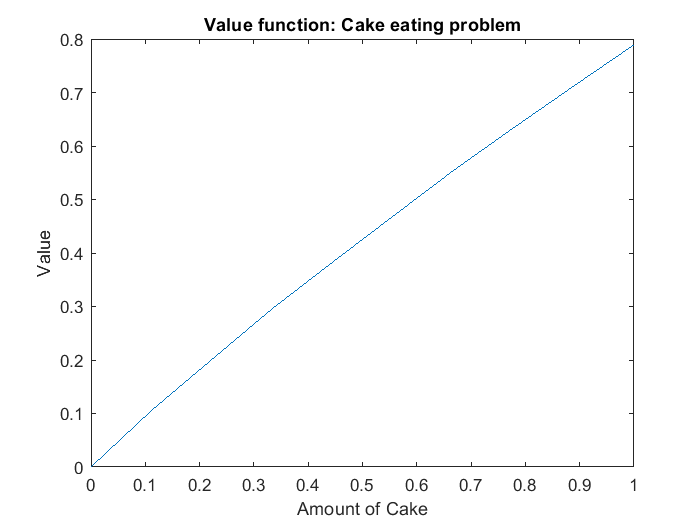

In [52]:
figure
plot(cake,V)
title('Value function: Cake eating problem')
xlabel('Amount of Cake')
ylabel('Value')

This procedure, in which we guess the value function and then iterate it until convergence, has a name that is not that original: **value function iteration**. This procedure is the standard for solving functional equations, and it is more stable (i.e., it finds the solution eventually) than other alternatives, but it is not time-efficient.

Are we done? No! The plot is pretty nice, but we started this with a clear objective: Given a starting point, how much cake should be eaten?

To obtain the optimal plan for eating the cake, we need to focus on the index of the maximum point of the value function. Remember, again, that the function is:

$$ V(a) = \max_c \left[ \log(c) + \beta V(a') \right]$$

So, the optimal consumption is the one maximizing the value function. So, this time, when we obtain the maximum inside the iteration process, we will care about the maximum value for the value function and the consumption level that generates that.

In [127]:
V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

max_iter = 4;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V_0(a_prime);
            end
        end
    end
    
    [V Ind] = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

Ind

cake

V_original = V;

Ind = 1x10 double
     1     1     1     2     2     3     4     4     5     6

cake = 1x10 double
         0    0.1111    0.2222    0.3333    0.4444    0.5556    0.6667    0.7778    0.8889    1.0000

So, this is the index of the optimal cake we will leave tomorrow if we start with a given amount today. Notice that if we start with all the cake (position ten, equal to 1), the optimal plan is to leave position six tomorrow (equal to 0.5556 cake). Then, if we start from position six, we will leave position three for tomorrow (equal to 0.2222 cake). Finally, if we start from position three, we will leave position one for tomorrow (equal to 0 cake). 

Notice that the policy is in terms of the cake we leave for tomorrow (that is our state variable). However, we want to know the consumption, so we have to translate it.

In [131]:
a_prime=cake(Ind)

a_prime = 1x10 double
         0         0         0    0.1111    0.1111    0.2222    0.3333    0.3333    0.4444    0.5556

In [132]:
consump = cake' - a_prime'

consump = 10x1 double
         0
    0.1111
    0.2222
    0.2222
    0.3333
    0.3333
    0.3333
    0.4444
    0.4444
    0.4444

What we have here is called the **policy function**. This function states what to do, given the state variables.

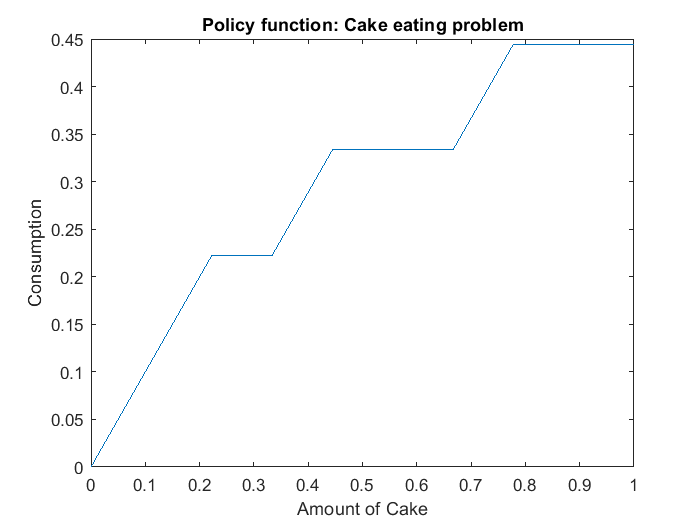

In [136]:
figure
plot(cake,consump)
title('Policy function: Cake eating problem')
xlabel('Amount of Cake')
ylabel('Consumption')

consumption_original = consump;

Now, before we proceed to a more complicated cake (yes, cakes can be complicated), I want to show you the strength of the value function and what it is actually telling us. Remember that at the beginning, we said that the value function is the present value of discounted future utilities under the optimal plan? Well, now we can check that.

Suppose we have the total amount of cake. What is the value of that? Well, we can check it by calling the value function at the value 10.

In [69]:
V(10)

ans = 0.7892

Now, if we have the total amount of cake, we know that we will eat 0.444 in the first period, then 0.3333 in the second period, and finally 0.2222 in the third period. So, let's compute the utility of that consumption path. Here we are computing this:

$$ V(1) = \log(1+0.444) + \beta \left( \log(1+0.3333) + \beta \left[ \log(1+0.2222) + V(0) \right]   \right) $$

And this case, we know that $v(0)=0$. Then:

In [71]:
log(1+consump(10)) + beta*log(1+consump(6)) + beta^2*log(1+consump(3))

ans = 0.7892

**Magic!** 

Take a moment to process this. We just iterated a function, following a rule, and the result of that function is actually the present value of the discounted utilities under the optimal plan. This is frankly amazing.

Now, you will have to check that the value function delivers the correct value for someone starting with 0.8889, 0.4444, and 0.1111 cakes.

In [74]:
% Starting with 0.8889
V(9)
log(1+consump(9)) + beta* log(1+consump(5)) + beta^2*log(1+consump(2))

ans = 0.7120

ans = 0.7120

In [75]:
% Starting with 0.4444
V(5)
log(1+consump(5)) + beta* log(1+consump(2))

ans = 0.3825

ans = 0.3825

In [76]:
% Starting with 0.1111
V(2)
log(1+consump(2))

ans = 0.1054

ans = 0.1054

Great! So, we learned how to eat cake like proper economists, not too bad at all.

## 3. The cake strikes back

Brilliant. Now that we have solved our problem of eating cake, we can think of other ways this problem could be complex. Why do we need something more complex? Well, as economists, we like to solve problems in which agents make multiple decisions at the same time (e.g., consumption and capital investments), which is still far from our simple cake problem.  

Let's imagine that the cake "depreciates" every period. That means that from the amount of cake we will leave for tomorrow, a given share $0<\delta<1$ of it will go to waste. Then, we can write this problem as:

$$ V(a) = \max_c \left[ \log(1+c) + \beta V(a') \right]$$

$$ s.t: a' = (1-\delta)(a-c) $$

The whole trick here is how to write consumption. In the previous case, consumption was found following:

$$ c = a - a' $$

In this new case, it will be given by:

$$ a' = (1-\delta)(a-c) $$

$$ a' = (1-\delta)a - (1-\delta)c $$

$$  (1-\delta) c = (1-\delta) a - a' $$

$$ c = a - \frac{a'}{1-\delta} $$

And that is all. We have to update this in our code, and we incorporated depreciation into the model.

In [191]:
V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

delta = 0.10;

max_iter = 3;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)/(1-delta)) + beta*V_0(a_prime); % Notice the inclusion of delta!
            end
        end
    end
    
    [V Ind] = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

dif

Ind

cake

V_depreciation = V;

dif = 100x1 double
    3.8186
    0.1637
         0
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
...

Ind = 1x10 double
     1     1     1     1     2     2     3     3     4     4

cake = 1x10 double
         0    0.1111    0.2222    0.3333    0.4444    0.5556    0.6667    0.7778    0.8889    1.0000

Now, we can check how the value functions differ. Intuition tells us that the value function for the case without depreciation should be bigger because it has more cake overall. Also, we can tell that the greater the amount of cake, the bigger the difference in the value functions will be because the depreciation rate will imply that more cake is lost.

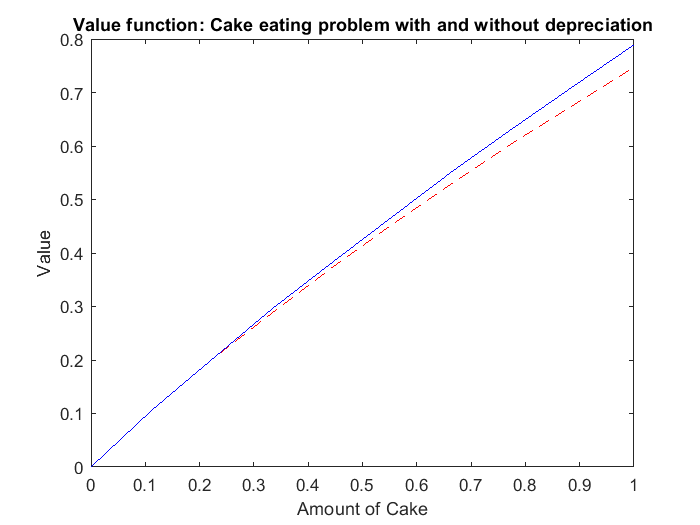

In [141]:
figure
plot(cake,V,'--','color','red')
hold on
plot(cake,V_original, 'color', 'blue')
title('Value function: Cake eating problem with and without depreciation')
xlabel('Amount of Cake')
ylabel('Value')

Excellent! Our intuition was correct. What about consumption? Well, in the case of depreciation, we should eat more cake. Otherwise, it will go to waste. Let's check it.

a_prime = 1x10 double
         0         0         0         0    0.1111    0.1111    0.2222    0.2222    0.2222    0.3333

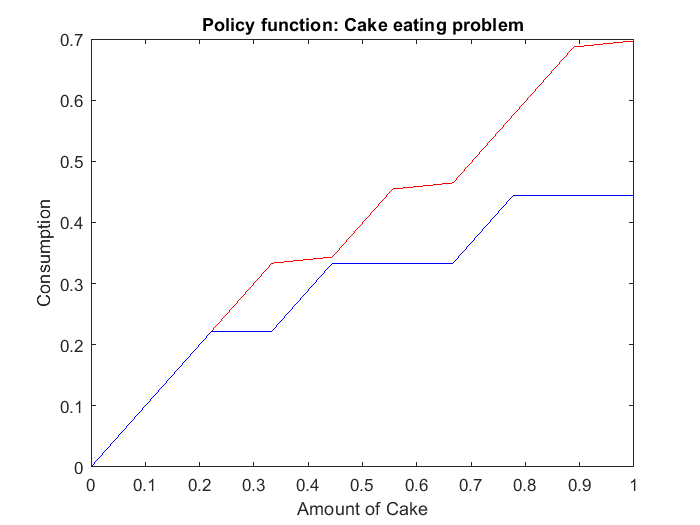

In [211]:
a_prime=cake(Ind)
consump_depreciation = cake' - a_prime'/(1+delta);

figure
plot(cake,consump_depreciation,'red')
hold on
plot(cake,consumption_original,'blue')
title('Policy function: Cake eating problem')
xlabel('Amount of Cake')
ylabel('Consumption')

Exactly as we predicted, very well. Always remember that we are economists first and then programmers. Keeping this in mind is essential because our economic intuition and knowledge will tell us if the results we find make sense. Before starting to make a code about a model, a good idea is to consider the type of result we should obtain. This is critical because, in more complicated models, it will be easy to make mistakes that will make the code run without a problem (e.g., a sign switch), so knowing what should be obtained is helpful to rule out those errors. 

## 4. The return of the cake

Now, we will complicate the model more. Imagine that the cake has the same properties that we have seen before. This means it is a one-unit cake with a depreciation rate $\delta$. But now, independent of the amount of cake we left, the cake we will have tomorrow will be given by the cake after depreciation plus a fixed new amount of cake, which we can call $\gamma$ (i.e., someone is buying cake and putting it in the fridge every morning). You can consider $\gamma=0.05$. 

So, we will take some time to solve this model. Ask questions! An excellent first idea would be to write the problem as we did before. It is very useful to understand what is changing and how to incorporate it into the new model.

So, first, we will comment on what we should expect. The model generates a fixed amount of cake in each period. This changes the problem because we will never run out of cake anymore; if we eat the entire cake today, we will have $\gamma$ cake tomorrow. Given this, the optimal consumption path will imply eating more cake. Also, given the above, this should mean that the value function is bigger than the original one because we will never run out of cake!

Our new model is given by:

$$ V(a) = \max_c \left[ \log(1+c) + \beta V(a') \right]$$

$$ s.t: a' = (1-\delta)(a-c)+\gamma $$

Then, the consumption is given by:

$$ a' = (1-\delta)(a-c) + \gamma $$

$$ a' = (1-\delta)a - (1-\delta)c + \gamma $$

$$  (1-\delta) c = (1-\delta) a - a' + \gamma $$

$$ c = a - \frac{a'-\gamma}{1-\delta} $$



Notice that this problem will take a lot more iterations to converge. We will try one hundred of them.

In [201]:
V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

delta = 0.10;

gamma = 0.05;

max_iter = 100;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - (cake(a_prime)-gamma)/(1-delta)) + beta*V_0(a_prime); % Notice the inclusion of delta!
            end
        end
    end
    
    [V Ind] = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

dif(max_iter)

Ind

cake

V_final = V;

ans = 1.5957e-05

Ind = 1x10 double
     1     1     1     1     2     2     3     3     3     4

cake = 1x10 double
         0    0.1111    0.2222    0.3333    0.4444    0.5556    0.6667    0.7778    0.8889    1.0000

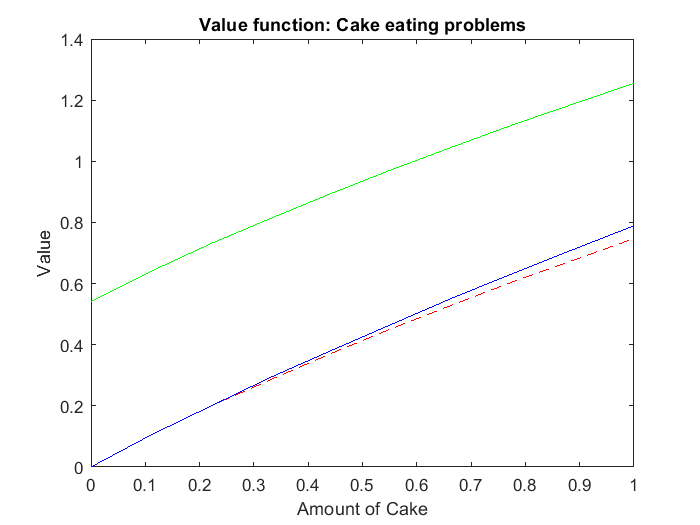

In [203]:
figure
plot(cake,V_depreciation,'--','color','red')
hold on
plot(cake,V_original, 'color', 'blue')
plot(cake,V_final, 'color', 'green')
title('Value function: Cake eating problems')
xlabel('Amount of Cake')
ylabel('Value')

And now we will check the consumption path:

a_prime = 1x10 double
         0         0         0         0    0.1111    0.1111    0.2222    0.2222    0.2222    0.3333

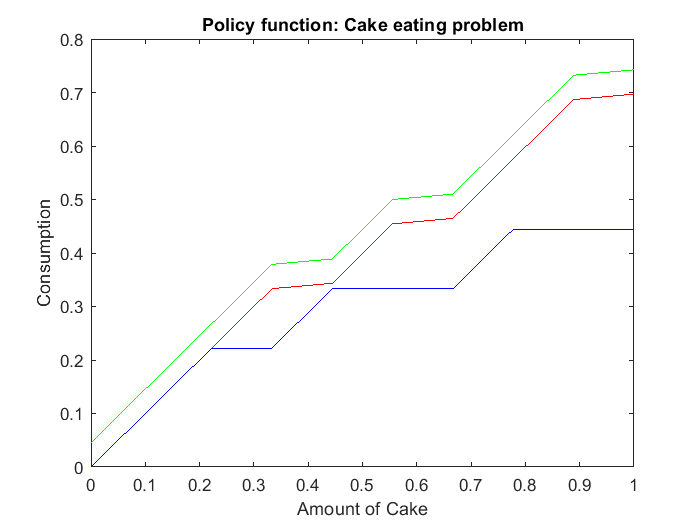

In [213]:
a_prime=cake(Ind)
consumption_final = cake' - (a_prime'-gamma)/(1+delta);

figure
plot(cake,consump_depreciation,'red')
hold on
plot(cake,consumption_original,'blue')
plot(cake,consumption_final,'green')
title('Policy function: Cake eating problem')
xlabel('Amount of Cake')
ylabel('Consumption')

And it makes complete sense, exactly as we predicted. Notice that when we leave no cake for tomorrow, we will consume $\gamma$.

Fantastic, we learned how to eat cake properly. One last thing I would like to discuss is how the selection of the grid will affect your results. In concrete terms, the value functions are usually well-behaved, so the grid will not affect them too much. However, the policy function is very sensitive to the grid, and because of that, changes in the grid will change the policy in a significant way. Let's check this.

So, we will compute our original cake problem with a grid of ten, fifty and five hundred points. Then, we will plot the value and policy functions and compare them.

In [300]:
cake = linspace(0,1,10);

V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

max_iter = 4;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V_0(a_prime);
            end
        end
    end
    
    [V Ind] = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

Ind

cake_10 = cake;

V_10 = V;

a_prime=cake_10(Ind);
consump = cake_10' - a_prime';

consumption_10 = consump;

Ind = 1x10 double
     1     1     1     2     2     3     4     4     5     6

In [302]:
cake = linspace(0,1,50);

V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

max_iter = 4;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V_0(a_prime);
            end
        end
    end
    
    [V Ind] = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

Ind

cake_50=cake;

V_50 = V;

a_prime=cake_50(Ind)
consumption_50 = cake_50' - a_prime'

Ind = 1x50 double
     1     1     1     1     1     1     1     2     2     3     3     4     4     5     5     6     6     6     7     8     8     9    10    10    11    11    12    13    13    14
...

a_prime = 1x50 double
         0         0         0         0         0         0         0    0.0204    0.0204    0.0408    0.0408    0.0612    0.0612    0.0816    0.0816    0.1020    0.1020    0.1020    0.1224    0.1429    0.1429    0.1633    0.1837    0.1837    0.2041    0.2041    0.2245    0.2449    0.2449    0.2653
...

consumption_50 = 50x1 double
         0
    0.0204
    0.0408
    0.0612
    0.0816
    0.1020
    0.1224
    0.1224
    0.1429
    0.1429
...

In [304]:
cake = linspace(0,1,500);

V_0 = zeros(1,length(cake));

aux=zeros(length(cake),length(cake));

dif = zeros(max_iter,1)+NaN;

max_iter = 4;

for i=1:max_iter
    for a=1:length(cake) %Cake at the beginning of the period
        for a_prime=1:length(cake) %Cake at the end of the period (restricted to be at most the entire cake)
            if a_prime>a %We cannot eat more than the total cake
                aux(a,a_prime)=-inf;
            else
                aux(a,a_prime) = log(1+cake(a) - cake(a_prime)) + beta*V_0(a_prime);
            end
        end
    end
    
    [V Ind] = max(aux'); % This vector is 1x10
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

Ind

cake_500=cake;

V_500 = V;

a_prime=cake_500(Ind)
consumption_500 = cake_500' - a_prime'

Ind = 1x500 double
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
...

a_prime = 1x500 double
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
...

consumption_500 = 500x1 double
         0
    0.0020
    0.0040
    0.0060
    0.0080
    0.0100
    0.0120
    0.0140
    0.0160
    0.0180
...

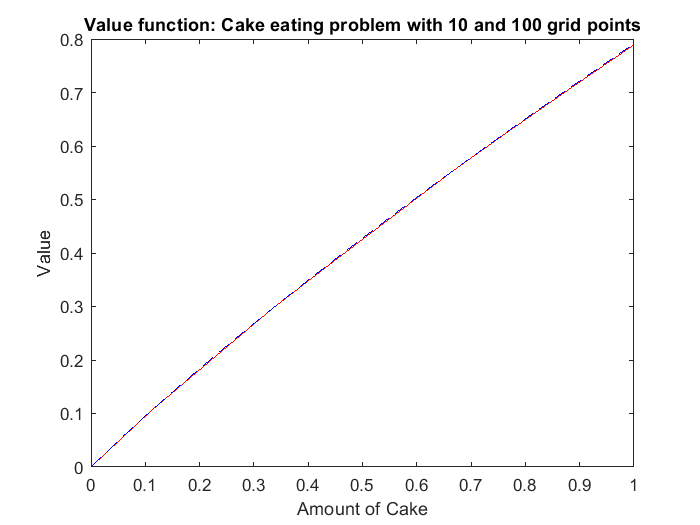

In [298]:
figure
plot(cake_10,V_10,'color','red')
hold on
plot(cake_50,V_50, 'color', 'blue','Linestyle','--')
title('Value function: Cake eating problem with 10 and 100 grid points')
xlabel('Amount of Cake')
ylabel('Value')

They are practically identical, so remember that. The grid will not significantly affect the value function, which is great if you are solving a problem using value function iteration.

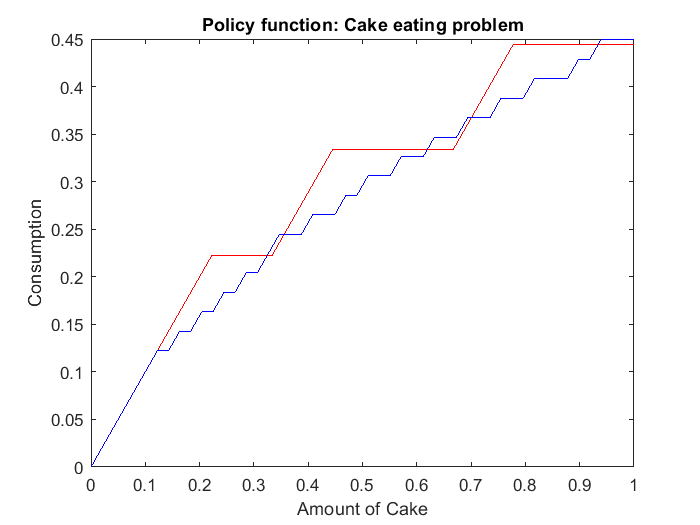

In [306]:
figure
plot(cake_10,consumption_10,'red')
hold on
plot(cake_100,consumption_100,'blue')
title('Policy function: Cake eating problem')
xlabel('Amount of Cake')
ylabel('Consumption')

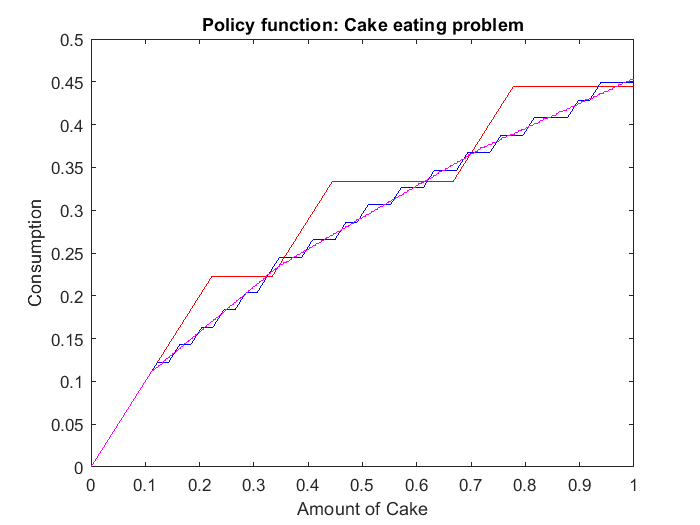

In [308]:
figure
plot(cake_10,consumption_10,'red')
hold on
plot(cake_100,consumption_100,'blue')
plot(cake_1000,consumption_1000,'magenta')
title('Policy function: Cake eating problem')
xlabel('Amount of Cake')
ylabel('Consumption')

Be careful with this because, in economics, we care a lot about the solutions made by the agents. You should generally use a grid that is as big as possible. This section was a piece of cake! Now, we will move to the Solow model. 

## 5. The deterministic Solow model

It took us a while, but we are about to "solve" our first economic model. The Solow model is a standard model in the neoclassical theory of economic growth. It considers the following components. We have a household that has to decide on consumption and capital investments. The household wants to maximize the following utility function:

$$ U = \sum_{i=0}^\infty \beta^i u(c_i) $$

Where $u(c_i)=log(c_i)$. 

And this problem is subject to the budget constraint given by:

$$ Y_t = c_t + I_t $$

Where $Y_t$ is the period's output, $c_t$ is the period's consumption, and $I_{t}$ is the capital investments for the next period.

We also know that the production is given by:

$$ Y_t = A k^\alpha $$

And the law of motion of capital is given by:

$$ k_{t+1} = (1-\delta) k_{t} + I_{t} $$

Solow thought that economies, irrespective of their side, would have the same savings rate. So, in this model, the investments are given by:

$$ I_{t} = sY_{t} $$

This is a problem with several equations, but if you notice, we can combine them all together. First, we can replace the investment with the share of the output:

$$ Y = c_t + sY_{t} $$

Then, we can replace the definition of output:

$$ A k_{t}^\alpha = c_t +  sA k_{t}^\alpha $$

Then, consumption is given by:

$$ (1-s)A k_{t}^\alpha = c_t $$

And capital follows:

$$ k_{t+1} = (1-\delta) k_{t} + sA k_{t}^\alpha $$


And we are done. So the problem in recursive form is the following:

$$V(k) = \left[ log(c) + \beta V(k') \right]$$

$$ s.t: k' = (1-\delta) k + sA k^\alpha $$
Notice something a bit boring about the model: there is nothing to solve. Since the savings rate is given in the Solow model, there is nothing to choose. We produce the output, take a share $s$ of it, and send it to investments for the next period, and the other share $(1-s)$ goes to consumption..

However, we will plot the policy function for this model, which is given by the savings rate. Nevertheless, we have to discuss something first. What is the domain for capital? In the cake problem, we knew the cake space was restricted between 0 and 1. We only had one cake and could not have less than 0. 

In this case, the space for capital is not obvious! Luckily, we can use our previous knowledge to have a good idea of the space for capital that we should consider. We will use the capital in steady state as a reference.

We know that in a steady state, it must be that:

$$ k =  (1-\delta) k + sA k^\alpha $$

So:

$$ \delta k =  sA k^\alpha $$

$$ \delta =  sA k^{\alpha-1} $$

$$ \frac{\delta}{sA} =   k^{\alpha-1} $$

$$ \frac{sA}{\delta} =   k^{1-\alpha} $$

$$ \left[ \frac{sA}{\delta} \right]^{\frac{1}{1-\alpha}} =   k^{ss} $$






And now, we can take some values for this:

$$ \alpha = 0.2$$

$$ s = 0.25 $$

$$ A = 5 $$

$$ \delta = 0.2 $$

And the capital in steady state is given by:

In [2]:
alpha = 0.2;
s = 0.25;
A = 5;
delta = 0.2;

k_ss = (s*A/delta)^(1/(1-alpha))

k_ss = 9.8821

So, now we can plot the policy function for a range of capital between 0 and 1.5 times the capital in a steady state.

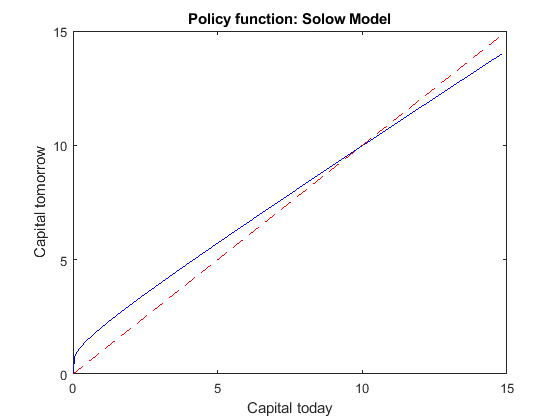

In [35]:
k_grid = linspace(0,1.5*k_ss,250);

k_solow = (1-delta)*k_grid + s*A*k_grid.^(alpha);

figure
plot(k_grid,k_solow,'blue')
hold on
plot(k_grid,k_grid,'red','Linestyle','--')
title('Policy function: Solow Model')
xlabel('Capital today')
ylabel('Capital tomorrow')

Great. We have the policy function for the Solow model, given some parameters. This model was huge in economics because it gave the idea of a capital level of steady-state and predicted that developing economies would grow faster than developed ones. However, it is subject to a very profound conceptual critique. Having a constant savings rate is inefficient. Some households would like to save more, and others would like to save less, depending on their situation. Given this, a new model was developed in which the savings rate was endogenous: The Ramsey model.

## 6. The deterministic Ramsey model

So, now we will have the same problem as before, but the savings rate is endogenous. This means that:

$$V(k) = \max_{c} \left[ log(c) + \beta V(k') \right]$$

$$ s.t.: k' = (1-\delta) k + Ak^\alpha - c $$

Now, we know that the consumption in a given period will be given by:

$$ c = (1-\delta)k + Ak^\alpha -k' $$

So, this problem is very similar to the one on the cake. If we choose the capital for the next period, the consumption for the actual period will be determined by it following the budget constraint. 

Great. But again, we have the problem of the capital grid. Notice that we cannot use the level of capital in a steady state now because there is no direct expression for it (It only has in the particular case when we use log utility and depreciation rate equal to 1). So, we will try a grid and see if the results obtained make sense and adjust it accordingly.

In [7]:
k_grid = linspace(1e-4,1.5*k_ss,100);

V_0 = zeros(1,length(k_grid));

aux=zeros(length(k_grid),length(k_grid));
max_iter = 10;
dif = zeros(max_iter,1)+NaN;

delta = 0.2;
beta = 0.95;
A=5;
alpha=0.2;

for i=1:max_iter
    for k=1:length(k_grid) %Capital at the beginning of the period
        for k_prime=1:length(k_grid) %Capital at the end of the period
            c = (1-delta)*k_grid(k) + A*k_grid(k)^alpha - k_grid(k_prime);
            if c<0
                aux(k,k_prime) = -inf;
            else
                aux(k,k_prime) = log (c) + beta*V_0(k_prime);
            end
        end
    end
    
    [V Ind] = max(aux');
    dif(i) = sum(abs(V-V_0));
    V_0 = V;
    
end

dif

dif = 10x1 double
  248.1816
  177.9200
  161.6648
  151.2473
  142.7413
  135.1660
  128.1791
  121.6427
  115.4883
  109.6686

Good, the algorithm is converging, but notice that we are still far from an acceptable distance. We could increase the number of iterations until we find convergence, but this could be a bit long, so we change the algorithm and tell it that we want to iterate until the distance is short enough.


In [41]:
k_grid = linspace(1e-4,1.5*k_ss,500);

V_0 = zeros(1,length(k_grid));

aux=zeros(length(k_grid),length(k_grid));
max_iter = 10;
dif = zeros(max_iter,1)+NaN;

delta = 0.2;
beta = 0.95;
A=5;
alpha=0.2;

iter = 0;
dif = 1;

while dif>1e-5
    for k=1:length(k_grid) %Capital at the beginning of the period
        for k_prime=1:length(k_grid) %Capital at the end of the period
            c = (1-delta)*k_grid(k) + A*k_grid(k)^alpha - k_grid(k_prime);
            if c<0
                aux(k,k_prime) = -inf;
            else
                aux(k,k_prime) = log (c) + beta*V_0(k_prime);
            end
        end
    end
    
    [V Ind] = max(aux');
    dif = sum(abs(V-V_0));
    V_0 = V;

    iter = iter + 1;
    
end

V_original = V;
Ind_original = Ind;

iter
dif

iter = 358

dif = 9.6954e-06

Excellent. Notice that to obtain a good convergence value, we need to do the iteration more than 300 times. That is why we did not want to adjust the iterations manually.

Let's check the value function:

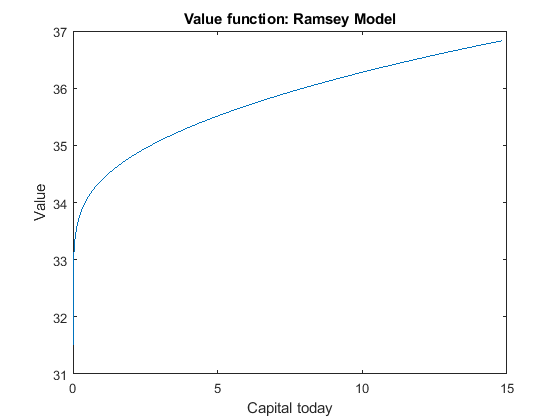

In [34]:
figure
plot(k_grid,V)
title('Value function: Ramsey Model')
xlabel('Capital today')
ylabel('Value')

Ok, it makes sense. More capital is associated with more value. Let's check consumption:

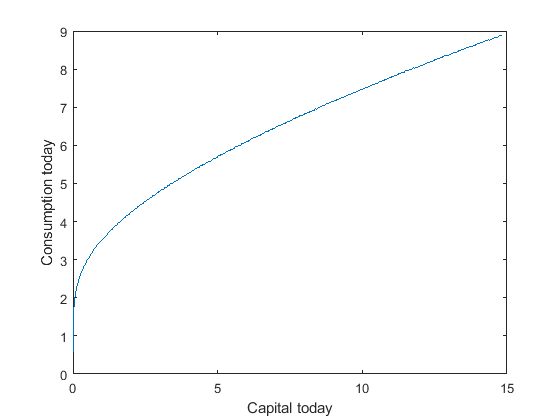

In [39]:
cons_original = (1-delta)*k_grid + A*k_grid.^alpha - k_grid(Ind);

figure
plot(k_grid,cons_original)
xlabel('Capital today')
ylabel('Consumption today')

Ok, this also makes sense. More capital today implies more consumption today.

Now, let's check the policy function:

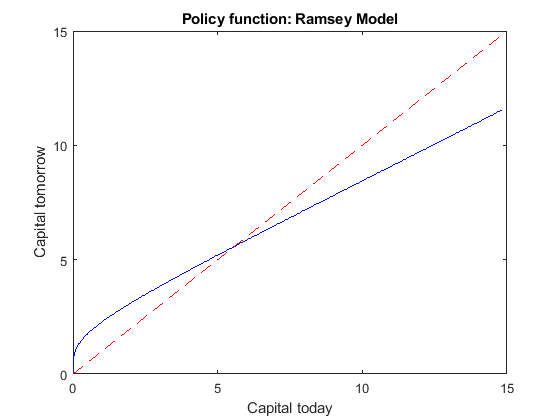

In [42]:
figure
plot(k_grid,k_grid(Ind_original),'blue')
hold on
plot(k_grid,k_grid,'red','Linestyle','--')
title('Policy function: Ramsey Model')
xlabel('Capital today')
ylabel('Capital tomorrow')

It looks like our guess for the grid is OK. However, the steady state is not what we predicted (around 10). This is not a problem, but we would like to know the value. For this, we will take the difference between the capital tomorrow and the capital today and select the index in which the difference is smaller. Visually, we can see that it has a value close to 5.

In [43]:
dif_ss = k_grid - k_grid(Ind_original);

[Val_min Ind_min] = min(abs(dif_ss)); % Notice the abs value for the difference!

k_grid(Ind_min)

ans = 5.5847

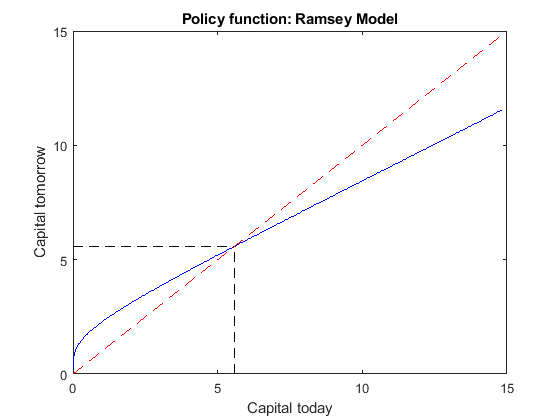

In [46]:
aux_ss = linspace(0,k_grid(Ind_min),100);

figure
plot(k_grid,k_grid(Ind_original),'blue')
hold on
plot(k_grid,k_grid,'red','Linestyle','--')
plot(aux_ss,k_grid(Ind_min)*ones(100,1),'black','Linestyle','--')
plot(k_grid(Ind_min)*ones(100,1),aux_ss,'black','Linestyle','--')
title('Policy function: Ramsey Model')
xlabel('Capital today')
ylabel('Capital tomorrow')

Now, we will play with the model's parameters and how the steady state and the policy function will change. First, imagine that we have another economy that is more productive (this means it has a higher $A$). What will happen to the policy function and the steady state in the new economy compared with the old one?

In [51]:
k_grid = linspace(1e-4,1.5*k_ss,500);

V_0 = zeros(1,length(k_grid));

aux=zeros(length(k_grid),length(k_grid));
max_iter = 10;
dif = zeros(max_iter,1)+NaN;

delta = 0.2;
beta = 0.95;
A=6;
alpha=0.2;

iter = 0;
dif = 1;

while dif>1e-5
    for k=1:length(k_grid) %Capital at the beginning of the period
        for k_prime=1:length(k_grid) %Capital at the end of the period
            c = (1-delta)*k_grid(k) + A*k_grid(k)^alpha - k_grid(k_prime);
            if c<0
                aux(k,k_prime) = -inf;
            else
                aux(k,k_prime) = log (c) + beta*V_0(k_prime);
            end
        end
    end
    
    [V Ind] = max(aux');
    dif = sum(abs(V-V_0));
    V_0 = V;

    iter = iter + 1;
    
end

V_A = V;
Ind_A = Ind;
cons_A = (1-delta)*k_grid + A*k_grid.^alpha - k_grid(Ind_A);

iter
dif

iter = 360

dif = 9.8969e-06

In [52]:
dif_ss = k_grid - k_grid(Ind_A);

[Val_min Ind_minA] = min(abs(dif_ss)); % Notice the abs value for the difference!

k_grid(Ind_minA)

ans = 7.0106

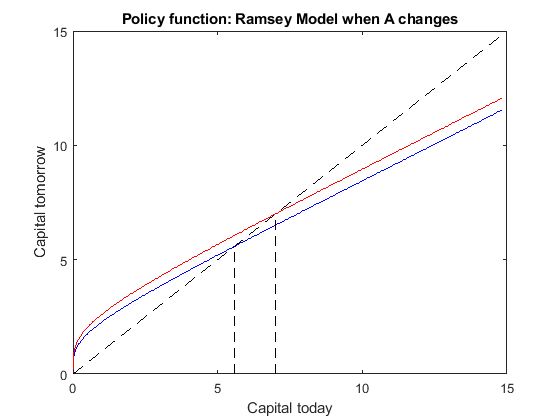

In [58]:
aux_ss1 = linspace(0,k_grid(Ind_min),100);
aux_ss2 = linspace(0,k_grid(Ind_minA),100);

figure
plot(k_grid,k_grid(Ind_original),'blue')
hold on
plot(k_grid,k_grid,'black','Linestyle','--')
plot(k_grid,k_grid(Ind_A),'red')
plot(k_grid(Ind_min)*ones(100,1), aux_ss1,'black','Linestyle','--')
plot(k_grid(Ind_minA)*ones(100,1), aux_ss2,'black','Linestyle','--')
title('Policy function: Ramsey Model when A changes')
xlabel('Capital today')
ylabel('Capital tomorrow')

The steady state increases. Excellent. Now, what would happen if the depreciation rate increases?

In [59]:
k_grid = linspace(1e-4,1.5*k_ss,500);

V_0 = zeros(1,length(k_grid));

aux=zeros(length(k_grid),length(k_grid));
max_iter = 10;
dif = zeros(max_iter,1)+NaN;

delta = 0.25;
beta = 0.95;
A=5;
alpha=0.2;

iter = 0;
dif = 1;

while dif>1e-5
    for k=1:length(k_grid) %Capital at the beginning of the period
        for k_prime=1:length(k_grid) %Capital at the end of the period
            c = (1-delta)*k_grid(k) + A*k_grid(k)^alpha - k_grid(k_prime);
            if c<0
                aux(k,k_prime) = -inf;
            else
                aux(k,k_prime) = log (c) + beta*V_0(k_prime);
            end
        end
    end
    
    [V Ind] = max(aux');
    dif = sum(abs(V-V_0));
    V_0 = V;

    iter = iter + 1;
    
end

V_delta = V;
Ind_delta = Ind;
cons_delta = (1-delta)*k_grid + A*k_grid.^alpha - k_grid(Ind_delta);

iter
dif

iter = 357

dif = 9.9302e-06

In [60]:
dif_ss = k_grid - k_grid(Ind_delta);

[Val_min Ind_mindelta] = min(abs(dif_ss)); % Notice the abs value for the difference!

k_grid(Ind_mindelta)

ans = 4.4559

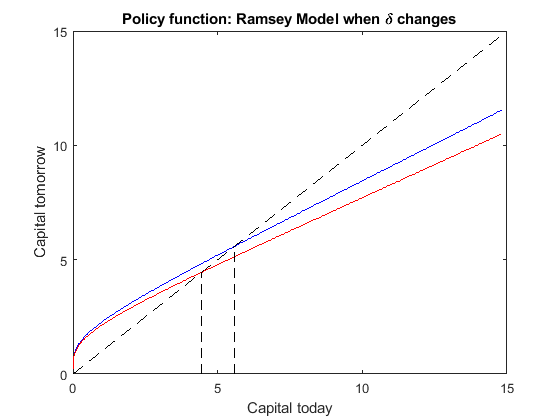

In [62]:
aux_ss1 = linspace(0,k_grid(Ind_min),100);
aux_ss2 = linspace(0,k_grid(Ind_mindelta),100);

figure
plot(k_grid,k_grid(Ind_original),'blue')
hold on
plot(k_grid,k_grid,'black','Linestyle','--')
plot(k_grid,k_grid(Ind_delta),'red')
plot(k_grid(Ind_min)*ones(100,1), aux_ss1,'black','Linestyle','--')
plot(k_grid(Ind_mindelta)*ones(100,1), aux_ss2,'black','Linestyle','--')
title('Policy function: Ramsey Model when \delta changes')
xlabel('Capital today')
ylabel('Capital tomorrow')

The steady state decreases. Good. Now, what would happen if the discount factor increases?

In [63]:
k_grid = linspace(1e-4,1.5*k_ss,500);

V_0 = zeros(1,length(k_grid));

aux=zeros(length(k_grid),length(k_grid));
max_iter = 10;
dif = zeros(max_iter,1)+NaN;

delta = 0.2;
beta = 0.98;
A=5;
alpha=0.2;

iter = 0;
dif = 1;

while dif>1e-5
    for k=1:length(k_grid) %Capital at the beginning of the period
        for k_prime=1:length(k_grid) %Capital at the end of the period
            c = (1-delta)*k_grid(k) + A*k_grid(k)^alpha - k_grid(k_prime);
            if c<0
                aux(k,k_prime) = -inf;
            else
                aux(k,k_prime) = log (c) + beta*V_0(k_prime);
            end
        end
    end
    
    [V Ind] = max(aux');
    dif = sum(abs(V-V_0));
    V_0 = V;

    iter = iter + 1;
    
end

V_beta = V;
Ind_beta = Ind;
cons_beta = (1-delta)*k_grid + A*k_grid.^alpha - k_grid(Ind_beta);

iter
dif

iter = 907

dif = 9.9390e-06

In [64]:
dif_ss = k_grid - k_grid(Ind_beta);

[Val_min Ind_minbeta] = min(abs(dif_ss)); % Notice the abs value for the difference!

k_grid(Ind_minbeta)

ans = 6.6244

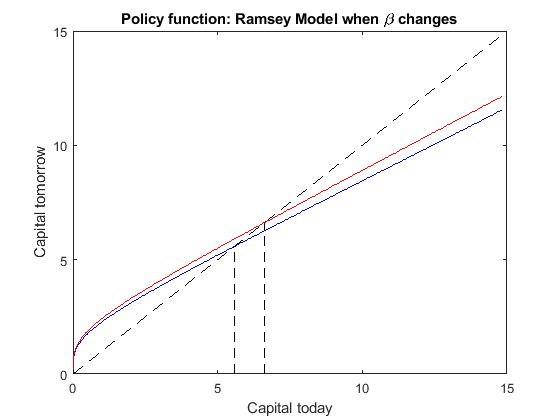

In [66]:
aux_ss1 = linspace(0,k_grid(Ind_min),100);
aux_ss2 = linspace(0,k_grid(Ind_minbeta),100);

figure
plot(k_grid,k_grid(Ind_original),'blue')
hold on
plot(k_grid,k_grid,'black','Linestyle','--')
plot(k_grid,k_grid(Ind_beta),'red')
plot(k_grid(Ind_min)*ones(100,1), aux_ss1,'black','Linestyle','--')
plot(k_grid(Ind_minbeta)*ones(100,1), aux_ss2,'black','Linestyle','--')
title('Policy function: Ramsey Model when \beta changes')
xlabel('Capital today')
ylabel('Capital tomorrow')

Great. As you can see, every time we want to change a parameter, it is a bit tedious because we have to run all the code again using the change in the parameter. The last activity for this lecture will be to create a function that receives the change in the parameters we want, and it plots the original model and the modified one. Once you have this, compute the plot for the case where alpha increases to 0.4.

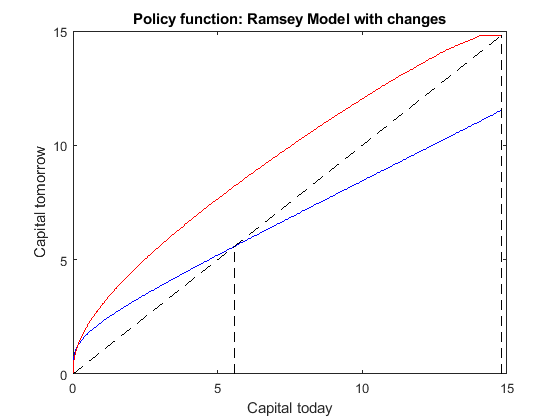

k_ss_original = 5.5847

k_ss_new = 14.8232

In [80]:
[k_ss_original,k_ss_new] = ramsey_model(k_ss,0,0,0,0.2)

The function works well, but our grid is not working here because of the reference value for the steady state. So we will increase it (in the code directly or add it as a parameter). Now, it should work.

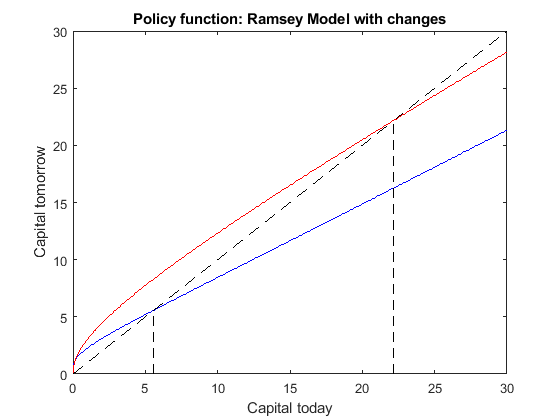

k_ss_original = 5.5913

k_ss_new = 22.1844

In [81]:
[k_ss_original,k_ss_new] = ramsey_model(20,0,0,0,0.2)

Brilliant! And that is it for this lecture. I hope you enjoy it! Next time you eat cake or make an investment, remember to compute your policy function first!